In [1]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

C:\Users\ganev\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ganev\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\ganev\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\ganev\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tic='USDGBP=X'

In [3]:
start=(datetime.datetime.now() - datetime.timedelta(days=365)).strftime("%Y-%m-%d")
end=datetime.datetime.now().strftime("%Y-%m-%d")
financial_data = web.DataReader(tic, 'yahoo', start, end)


In [4]:
financial_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-18,0.79710,0.79123,0.79577,0.79576,0,0.79576
2019-06-19,0.79028,0.78581,0.79028,0.79010,0,0.79010
2019-06-20,0.79083,0.78589,0.78706,0.78691,0,0.78691
2019-06-23,0.78672,0.78329,0.78428,0.78426,0,0.78426
2019-06-24,0.78663,0.78223,0.78496,0.78495,0,0.78495
...,...,...,...,...,...,...
2020-06-14,0.80281,0.79501,0.79921,0.79944,0,0.79944
2020-06-15,0.79616,0.78820,0.79125,0.79128,0,0.79128
2020-06-16,0.79909,0.79445,0.79467,0.79459,0,0.79459


In [42]:
from datetime import datetime
import MetaTrader5 as mt5
# display data on the MetaTrader 5 package
print("MetaTrader5 package author: ",mt5.__author__)
print("MetaTrader5 package version: ",mt5.__version__)
 
# import the 'pandas' module for displaying data obtained in the tabular form
import pandas as pd
import pytz
 
# establish connection to MetaTrader 5 terminal
if not mt5.initialize():
    print("initialize() failed, error code =",mt5.last_error())
    quit()
 
# set time zone to UTC
timezone = pytz.timezone("Etc/UTC")
# create 'datetime' object in UTC time zone to avoid the implementation of a local time zone offset
utc_from = datetime(2020, 1, 10, tzinfo=timezone)
# get 10 EURUSD H4 bars starting from 01.10.2020 in UTC time zone
rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M15, utc_from, 100)
 
# shut down connection to the MetaTrader 5 terminal
mt5.shutdown()

 
# create DataFrame out of the obtained data
rates_frame = pd.DataFrame(rates)
# convert time in seconds into the datetime format
rates_frame['time']=pd.to_datetime(rates_frame['time'], unit='s')
                           
# display data
print("\nDisplay dataframe with data")
rates_frame.head(20)

MetaTrader5 package author:  MetaQuotes Software Corp.
MetaTrader5 package version:  5.0.33

Display dataframe with data


,time,open,high,low,close,tick_volume,spread,real_volume
0,2020-01-08 23:15:00,1.11084,1.11099,1.11084,1.11093,75,3,0
1,2020-01-08 23:30:00,1.11093,1.11093,1.11083,1.11084,97,2,0
2,2020-01-08 23:45:00,1.11084,1.11084,1.11016,1.11053,370,2,0
3,2020-01-09 00:00:00,1.11053,1.11077,1.11033,1.11068,197,3,0
4,2020-01-09 00:15:00,1.11064,1.11132,1.11064,1.11105,178,2,0
5,2020-01-09 00:30:00,1.11099,1.11104,1.11086,1.11102,94,7,0
6,2020-01-09 00:45:00,1.11102,1.11131,1.11088,1.11095,101,5,0
7,2020-01-09 01:00:00,1.11097,1.11097,1.11072,1.11083,105,2,0
8,2020-01-09 01:15:00,1.11083,1.11104,1.11081,1.11102,76,3,0
9,2020-01-09 01:30:00,1.11102,1.11114,1.11097,1.11107,82,2,0


In [43]:
rates_frame=rates_frame.drop(columns=['spread','real_volume'])
rates_frame.columns=["Date","Open","High","Low","Close", "Volume"]
rates_frame=rates_frame.set_index('Date')


In [44]:
df=pd.DataFrame(rates_frame.Close)
mins=pd.DataFrame(df.Close[(df.Close.shift(1) > df.Close) & (df.Close.shift(-1) > df.Close)])
maxs=pd.DataFrame(df.Close[(df.Close.shift(1) < df.Close) & (df.Close.shift(-1) < df.Close)])

Text(0.5, 1, 'EUR/USD')

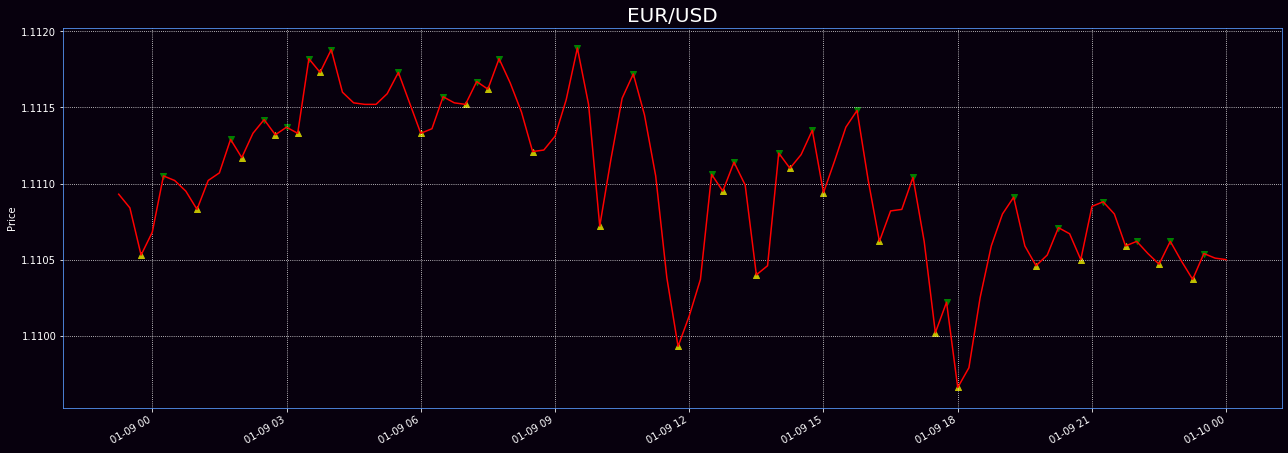

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

fig = plt.figure(figsize=(18,12), facecolor='#07000D')#
ax = plt.subplot2grid((12,4),(0,0), rowspan = 7, colspan = 4, facecolor='#07000D')
ax.grid(linestyle=':', color='w')
ax.yaxis.label.set_color('w')
ax.plot(df.index,df.Close,color='r', label = 'Predictions')
ax.spines['bottom'].set_color("#599Bff")
ax.spines['top'].set_color("#599Bff")
ax.spines['left'].set_color("#599Bff")
ax.spines['right'].set_color("#599Bff")
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')

ax.scatter(maxs.index,maxs.Close,color='g',marker='v')
ax.scatter(mins.index,mins.Close,color='y',marker='^')

plt.ylabel('Price')

fig.autofmt_xdate()
fig.tight_layout()

ax.get_figure().autofmt_xdate()
ax.set_title('EUR/USD', color='w', fontsize = 20)

#ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H'))

In [27]:
maxs

,Close
Date,
2020-01-08 06:40:00,1.11480
2020-01-08 07:05:00,1.11487
2020-01-08 07:35:00,1.11505
2020-01-08 08:05:00,1.11502
2020-01-08 08:25:00,1.11528
...,...
2020-01-09 22:30:00,1.11061
2020-01-09 22:55:00,1.11062
2020-01-09 23:05:00,1.11060


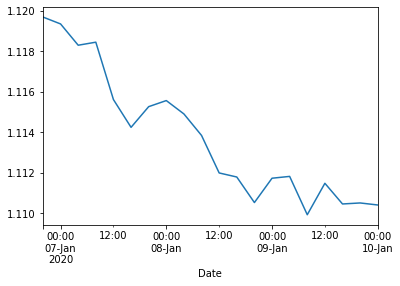

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Find local peaks
df['min'] = df.Close[(df.Close.shift(1) > df.Close) & (df.Close.shift(-1) > df.Close)]
df['max'] = df.Close[(df.Close.shift(1) < df.Close) & (df.Close.shift(-1) < df.Close)]

# Plot results
#plt.scatter(df.index, df['min'], c='r')
#plt.scatter(df.index, df['max'], c='g')
df.Close.plot()

In [4]:
maxs

,Close
Date,
2020-01-07 08:00:00,1.11844
2020-01-08 00:00:00,1.11556
2020-01-09 04:00:00,1.11182
2020-01-09 12:00:00,1.11148
2020-01-09 20:00:00,1.11051


In [61]:
rates_frame=rates_frame.drop(columns=['spread','real_volume'])
rates_frame.columns=["Date","Open","High","Low","Close", "Volume"]
rates_frame=rates_frame.set_index('Date')


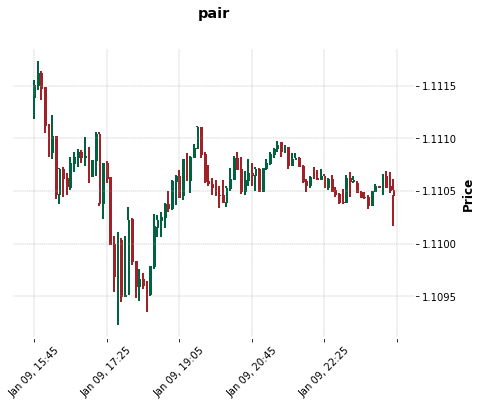

In [63]:
import pandas as pd
import mplfinance as mpf



mpf.plot(rates_frame, type='candle', style='charles',
            title='pair',
            ylabel='Price',
            ylabel_lower='Volume',
            volume=False)

In [64]:
fig = mpf.figure(figsize=(18,12), facecolor='#07000D')#
ax = plt.subplot2grid((12,4),(0,0), rowspan = 7, colspan = 4, facecolor='#07000D')
#ax.xaxis_datetime()
ax.grid(linestyle=':', color='w')
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color("#599Bff")
ax.spines['top'].set_color("#599Bff")
ax.spines['left'].set_color("#599Bff")
ax.spines['right'].set_color("#599Bff")
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Price')

fig.autofmt_xdate()
fig.tight_layout()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%Y-%m-%d %H:%M:%S'))


AttributeError: module 'mplfinance' has no attribute 'figure'

In [277]:
rates_frame=rates_frame.set_index('time')

In [287]:
rates_frame.columns=["Open","High","Low","Close", "Volume"]

In [285]:
rates_frame=rates_frame.drop(columns=['spread','real_volume'])
rates_frame.columns=["Open","High","Low","Close", "Volume"]

In [288]:
rates_frame

,Open,High,Low,Close,Volume
time,,,,,
2020-05-20 20:00:00,1.09761,1.09819,1.09739,1.09801,155
2020-05-20 20:15:00,1.09801,1.09802,1.09787,1.09791,105
2020-05-20 20:30:00,1.09791,1.09794,1.09758,1.09771,104
2020-05-20 20:45:00,1.09781,1.09790,1.09771,1.09771,97
2020-05-20 21:00:00,1.09800,1.09815,1.09791,1.09797,155
...,...,...,...,...,...
2020-05-29 18:45:00,1.10950,1.11007,1.10881,1.10994,966
2020-05-29 19:00:00,1.10995,1.11052,1.10980,1.10999,513
2020-05-29 19:15:00,1.10999,1.11027,1.10980,1.10982,255


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import copy

from   mplfinance._arg_validators import _process_kwargs, _validate_vkwargs_dict
from   mplfinance._styledata      import _styles


def _get_mpfstyle(style):
    ''' 
    Return a copy of the specified pre-defined mpfstyle.  We return
    a copy, because returning the original will effectively return 
    a pointer which allows style's definition to be modified.
    '''
    return copy.deepcopy(_styles[style])

def _apply_mpfstyle(style):

    if style['base_mpl_style'] is not None:
        plt.style.use(style['base_mpl_style']) 

    if style['rc'] is not None:
        plt.rcParams.update(style['rc'])

    if style['facecolor'] is not None:
        plt.rcParams.update({'axes.facecolor' : style['facecolor'] })

    if 'edgecolor' in style and style['edgecolor'] is not None:
        plt.rcParams.update({'axes.edgecolor' : style['edgecolor'] })

    if 'figcolor' in style and style['figcolor'] is not None:
        plt.rcParams.update({'figure.facecolor' : style['figcolor'] })

    explicit_grid = False
    if style['gridcolor'] is not None:
        explicit_grid = True
        plt.rcParams.update({'grid.color' : style['gridcolor'] })

    if style['gridstyle'] is not None:
        explicit_grid = True
        plt.rcParams.update({'grid.linestyle' : style['gridstyle'] })

    plt.rcParams.update({'axes.grid.axis' : 'both' })
    if 'gridaxis' in style and style['gridaxis'] is not None:
        gax = style['gridaxis']
        explicit_grid = True
        if gax == 'horizontal'[0:len(gax)]:
            plt.rcParams.update({'axes.grid.axis' : 'y' })
        elif gax == 'vertical'[0:len(gax)]:
            plt.rcParams.update({'axes.grid.axis' : 'x' })

    if explicit_grid:
        plt.rcParams.update({'axes.grid' : True })


def _valid_make_mpf_style_kwargs():
    vkwargs = {
        'base_mpf_style': { 'Default'     : None,
                            'Validator'   : lambda value: value in _styles.keys() },

        'base_mpl_style': { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) }, # and is in plt.style.available

        'marketcolors'  : { 'Default'     : None, # 
                            'Validator'   : lambda value: isinstance(value,dict)  },

        'mavcolors'     : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,list) },  # TODO: all([mcolors.is_color_like(v) for v in value.values()])

        'facecolor'     : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) },

        'edgecolor'     : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) },

        'figcolor'      : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) },

        'gridcolor'     : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) },

        'gridstyle'     : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) },

        'gridaxis'      : { 'Default'     : None,
                            'Validator'   : lambda value: value in [ 'vertical'[0:len(value)], 'horizontal'[0:len(value)], 'both'[0:len(value)] ] },

        'y_on_right'    : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,bool) },

        'rc'            : { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,dict) },

    }
    _validate_vkwargs_dict(vkwargs)
    return vkwargs

def available_styles():
    return list(_styles.keys())
       
def make_mpf_style( **kwargs ):
    config = _process_kwargs(kwargs, _valid_make_mpf_style_kwargs())

    if config['base_mpf_style'] is not None:
        style  = _get_mpfstyle(config['base_mpf_style'])
        update = [ (k,v) for k,v in config.items() if v is not None ]
        style.update(update)
    else:
        style  = config

    if style['marketcolors'] is None:
        style['marketcolors'] = _styles['default']['marketcolors']

    return style

def _valid_mpf_color_spec(value):
    'value must be a color, "inherit"-like, or dict of colors'
    return ( mcolors.is_color_like(value) or 
             ( isinstance(value,str) and value == 'inherit'[0:len(value)]) or
             ( isinstance(value,dict) and
               all([mcolors.is_color_like(v) for v in value.values()])
             )
           )

def _valid_make_marketcolors_kwargs():
    vkwargs = {
        'up'         : { 'Default'     : None,
                         'Validator'   : lambda value: mcolors.is_color_like(value) },

        'down'       : { 'Default'     : None,
                         'Validator'   : lambda value: mcolors.is_color_like(value) },

        'alpha'       : { 'Default'     : None,
                         'Validator'   : lambda value: ( isinstance(value,float) and
                                                         0.0 <= value and 1.0 >= value ) },

        'edge'       : { 'Default'     : None,
                         'Validator'   : lambda value: _valid_mpf_color_spec(value) },

        'wick'       : { 'Default'     : None,
                         'Validator'   : lambda value: isinstance(value,dict)
                                                       or isinstance(value,str) 
                                                       or mcolors.is_color_like(value) },

        'ohlc'       : { 'Default'     : None,
                         'Validator'   : lambda value: isinstance(value,dict)
                                                       or isinstance(value,str) 
                                                       or mcolors.is_color_like(value) },

        'volume'     : { 'Default'   : None,
                         'Validator'   : lambda value: isinstance(value,dict)
                                                       or isinstance(value,str) 
                                                       or mcolors.is_color_like(value) },

        'inherit'    : { 'Default'     : False,
                         'Validator'   : lambda value: isinstance(value,bool) },

        'base_mpf_style': { 'Default'     : None,
                            'Validator'   : lambda value: isinstance(value,str) },
    }
    _validate_vkwargs_dict(vkwargs)
    return vkwargs

def make_marketcolors(**kwargs):
    '''
    Create a 'marketcolors' dict that is structured as expected
    by mplfinance._styles code:
        up     = color for close >= open
        down   = color for close  < open
        edge   = color for edge of candlestick; if "inherit"
                 then edge color will be same as up or down.
        wick   = color for wick of candlestick; if "inherit"
                 then wick color will be same as up or down.
        alpha  = opacity, 0.0 to 1.0, of candlestick face.
        ohlc   = color of ohlc bars when all the same color;
                 if ohlc == "inherit" then use up/down colors.
        volume = color of volume bars when all the same color;
                 if volume == "inherit" then use up/down colors.
    '''

    config = _process_kwargs(kwargs, _valid_make_marketcolors_kwargs())

    if config['base_mpf_style'] is not None:
        style = _get_mpfstyle(config['base_mpf_style'])
    else:
        style = _get_mpfstyle('default')

    marketcolors = style['marketcolors']

    up   = config['up']
    down = config['down']
    if up is not None and down is not None:
        marketcolors.update(candle=dict(up=up,down=down))
    elif up is not None:
        candle = marketcolors['candle']
        candle.update(up=up)
        marketcolors.update(candle=candle)
    elif down is not None:
        candle = marketcolors['candle']
        candle.update(down=down)
        marketcolors.update(down=down)

    def _check_and_set_mktcolor(candle,**kwarg):
        if len(kwarg) != 1:
            raise ValueError('Expect only ONE kwarg')
        key,value = kwarg.popitem()
        if isinstance(value,(dict)):
            colors = value
        elif isinstance(value,str) and value == 'inherit'[0:len(value)]:
            colors = candle
        else:
            colors = dict(up=value, down=value)
        for updown in ['up','down']:
            if not mcolors.is_color_like(colors[updown]):
                err = f'NOT is_color_like() for {key}[\'{updown}\'] = {colors[updown]}'
                raise ValueError(err)
        return colors

    candle = marketcolors['candle']

    for kw in ['edge','volume','ohlc','wick']:
        # `inherit=True` takes precedence:
        if config[kw] is not None or config['inherit'] == True:
            if config['inherit'] == True:
                kwa = {kw:'i'}
            else:
                kwa = {kw:config[kw]}
            c   = _check_and_set_mktcolor(candle,**kwa)
            marketcolors.update([(kw,c)])

    if config['alpha'] is not None:
        marketcolors.update({'alpha':config['alpha']})

    return marketcolors
